In [10]:
import pandas as pd
from ase.visualize import view as view_molecule
from ase.io import read as read_molecule
import ase
import numpy as np
import random


from ase.cell import Cell
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, MBTR

In [2]:
DATA_PATH = './nomad2018-predict-transparent-conductors'


In [3]:
train_data = pd.read_csv(
    f'{DATA_PATH}/train.csv')
train_data


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


In [4]:
test_data = pd.read_csv(
    f'{DATA_PATH}/test.csv')
test_data



,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,12,80.0,0.0000,0.5938,0.4062,24.8145,6.3964,6.2933,90.0002,104.7733,90.0001
596,597,33,40.0,0.1250,0.0000,0.8750,5.5783,9.4849,10.1107,90.0008,89.9967,90.0004
597,598,194,80.0,0.0000,0.2500,0.7500,6.9377,6.9372,25.0641,90.0072,89.9880,119.9857
598,599,33,40.0,0.6250,0.0000,0.3750,5.1841,8.8659,9.4956,90.0041,90.0009,90.0007


# Visualising the molecule

In [11]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            noise = np.array(
                [random.random()*0.001, random.random()*0.001, random.random()*0.001])
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=float)+noise, x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=float))
    return pos_data, np.array(lat_data)


xyzdata = get_xyz_data(f'{DATA_PATH}/train/10/geometry.xyz')
pos_data = xyzdata[0]
atoms = [ase.Atom(symbol=sym, position=pos) for pos, sym in pos_data]
mol = ase.Atoms(atoms)
# unlike jmol, the bonds are not automatically computed.
# hence, it does not look the same.
view_molecule(mol, viewer='x3d')


# Adding new features to the training data
- CoulombMatrix
- SineMatrix
- EwaldSumMatrix

In [12]:
np.array([1,2,3])+np.array([1,2,3])

array([2, 4, 6])

In [13]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=float), x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=float))
    return pos_data, np.array(lat_data)


get_xyz_data(f'{DATA_PATH}/train/10/geometry.xyz')


([[array([-0.05487074, -0.02429496,  5.9479779 ]), 'Ga'],
  [array([-0.16461223, -0.07288488, 17.84393368]), 'Al'],
  [array([4.59925077, 2.74195764, 6.00133319]), 'Ga'],
  [array([ 4.48950929,  2.69336772, 17.89728898]), 'Ga'],
  [array([3.07074593, 0.01523894, 5.9770041 ]), 'Ga'],
  [array([ 2.96100444, -0.03335098, 17.87295989]), 'Ga'],
  [array([1.4736341 , 2.70242374, 5.97230698]), 'Ga'],
  [array([ 1.36389262,  2.65383382, 17.86826277]), 'Al'],
  [array([0., 0., 0.]), 'Ga'],
  [array([-0.10974148, -0.04858992, 11.89595579]), 'Ga'],
  [array([4.65412151, 2.7662526 , 0.05335529]), 'Ga'],
  [array([ 4.54438003,  2.71766268, 11.94931108]), 'Al'],
  [array([3.12561667, 0.0395339 , 0.0290262 ]), 'Ga'],
  [array([ 3.01587519e+00, -9.05602000e-03,  1.19249820e+01]), 'Al'],
  [array([1.52850484, 2.7267187 , 0.02432909]), 'Al'],
  [array([ 1.41876336,  2.67812878, 11.92028488]), 'Ga'],
  [array([-0.05030208,  1.79230656,  2.98053228]), 'Ga'],
  [array([-0.16004356,  1.74371664, 14.87648807

In [14]:
n_atoms_max = int(train_data['number_of_total_atoms'].max())
n_atoms_max

80

In [15]:
molecules = []
for idx in train_data['id']:
    path = f'{DATA_PATH}/train/{idx}/geometry.xyz'
    xyz_data = get_xyz_data(path)
    pos_data = xyz_data[0]
    lattice_vector_data = xyz_data[1]
    # create molecule
    atoms = [ase.Atom(symbol=sym, position=pos) for pos, sym in pos_data]
    mol = ase.Atoms(atoms)
    mol.set_cell(Cell(lattice_vector_data))
    molecules.append(mol)

In [62]:
coulomb_matrices = CoulombMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2"
).create(molecules)


In [17]:
sine_matrices = SineMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2",
).create(molecules, n_jobs=6)


In [18]:
ewald_sum_matrices = EwaldSumMatrix(
    n_atoms_max=n_atoms_max,
    permutation="sorted_l2"
).create(molecules, n_jobs=6)


In [22]:
sine_matrices.shape

(2400, 6400)

In [25]:
len(ewald_sum_matrices[0])

6400

In [14]:
len(coulomb_matrices)

2400

In [26]:
train_data

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


converting to list before for writing purposes. If used directly, can assign `list(coulomb_matrices)` directly to the dataframe column.

In [27]:
train_data['CoulombMatrix'] = list(map(list, coulomb_matrices))
train_data['SineMatrix'] = list(map(list, sine_matrices))
train_data['EwaldSumMatrix'] = list(map(list, ewald_sum_matrices))


## Write data to a file and test i/o

In [28]:
train_data.to_csv(f'{DATA_PATH}/train_extrainfo.csv', index=False)

In [18]:
def custom_converter(entry):
    return np.array([float(x) for x in entry[1:-1].split(',')])

In [19]:
d = pd.read_csv(
    f'{DATA_PATH}/train_extrainfo.csv',
    converters={
        'CoulombMatrix':custom_converter,
        'SineMatrix':custom_converter,
        'EwaldSumMatrix':custom_converter
    }
)

In [20]:
d['CoulombMatrix'][0]

array([121.1169616 ,  75.93246627, 122.12105516, ...,   5.98180385,
         5.76648083,  22.95621302])

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy.linalg as LA
from sklearn.linear_model import LinearRegression

In [70]:
def get_eigenspectrum(matrix):
    spectrum = LA.eigvalsh(matrix)
    spectrum = np.sort(spectrum)[::-1]
    
    return spectrum

In [73]:
#eigen spectrum for COULOMB MATRIX

coulomb_spectrum_list = []

for i in range(len(molecules)):
    indv_coulomb_matrices = CoulombMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2"
    ).create(molecules[i])

    indv_coulomb_matrices_reshaped = np.reshape(indv_coulomb_matrices, (80, 80))
    coulomb_spectrum = get_eigenspectrum(indv_coulomb_matrices_reshaped)
    
    coulomb_spectrum_list.append(coulomb_spectrum)


In [77]:
len(coulomb_spectrum_list)

2400

In [78]:
coulomb_spectrum_df = pd.DataFrame(coulomb_spectrum_list).astype(np.float)
coulomb_spectrum_df = coulomb_spectrum_df.fillna(0)

ipykernel_launcher:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [79]:
coulomb_spectrum_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,5349.670575,2461.238885,2388.646992,1970.515905,1879.229060,1687.515631,1619.149902,690.312455,382.691651,281.769441,...,-254.250739,-279.496085,-341.163066,-1598.699411,-1719.355176,-1891.379647,-2039.259742,-2489.382511,-2597.659829,-2734.365505
1,4664.322585,2147.727882,1998.325524,1861.960977,1705.048052,1632.136799,1590.669761,1558.561418,1492.376760,654.182829,...,-413.818320,-1496.823919,-1544.634866,-1566.903258,-1623.816932,-1734.113741,-1806.289977,-1858.555690,-2138.252103,-2966.390007
2,2727.830716,1860.411298,1588.620741,552.747881,271.516366,236.203056,186.113271,173.590985,142.256288,131.995661,...,-88.026131,-103.703412,-113.934296,-191.318826,-210.035199,-226.004008,-294.823654,-1639.409806,-1862.883768,-2061.735274
3,7331.894032,5399.765457,4778.018158,514.965495,230.817922,167.771870,159.107466,114.975500,86.710914,71.134328,...,-56.373128,-66.902585,-77.627362,-83.466957,-109.657416,-186.131475,-199.580629,-277.410205,-5098.325108,-6106.648892
4,13920.567407,8054.780124,7661.623119,6149.728315,6011.462840,5412.362538,3381.764834,3010.433889,2539.909144,2055.048481,...,-1276.890588,-1885.138866,-2443.555876,-2766.815879,-3340.847398,-5148.200942,-5570.154756,-7562.172910,-8241.386034,-9085.907765


In [80]:
x = coulomb_spectrum_df.loc[:,:].values
y = train_data.loc[:,['formation_energy_ev_natom']].values
x = StandardScaler().fit_transform(x)

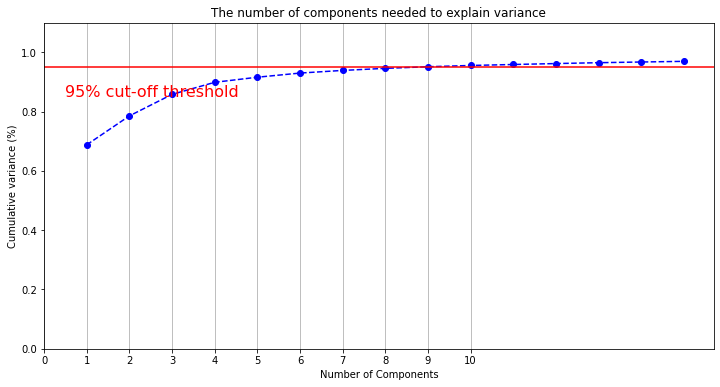

In [84]:
pca = PCA(n_components=15).fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [98]:
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

reg = LinearRegression().fit(principalDf, train_data['formation_energy_ev_natom'])
reg.score(principalDf,train_data['formation_energy_ev_natom'])

0.3898015101316591

In [86]:
pca.explained_variance_ratio_

array([0.68797027, 0.09746306, 0.07261114, 0.04070602, 0.01716595,
       0.01401086, 0.00893267, 0.00693118, 0.00546374])

In [99]:
dfcombined = pd.concat([train_data, principalDf], axis=1)
dfcombined2 = dfcombined.drop(['id','formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
dfcombined2.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,70,71,72,73,74,75,76,77,78,79
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,...,-0.029337,-0.000452,-0.060755,0.068600,-0.126525,0.010712,0.021773,-0.027105,0.083012,-0.052632
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,...,0.083757,-0.022014,-0.006907,0.022460,-0.061425,0.108517,-0.038490,0.019382,-0.050802,0.018504
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,...,0.001861,-0.002909,0.000796,0.005115,-0.007152,-0.001725,-0.000029,0.001548,-0.002388,-0.003256
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,...,-0.002135,-0.005387,0.001092,0.005910,0.003812,-0.000118,0.001986,-0.004804,-0.002550,-0.004216
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,...,0.080642,-0.049259,0.042088,0.043522,-0.012883,0.050297,0.017245,-0.013954,-0.053056,0.007861


In [100]:
reg = LinearRegression().fit(dfcombined2, train_data['formation_energy_ev_natom'])
reg.score(dfcombined2,train_data['formation_energy_ev_natom'])

/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.6206658927152027

In [101]:
#eigen spectrum for SINE MATRIX

sine_spectrum_list = []

for i in range(len(molecules)):
    indv_sine_matrices = SineMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2",
    ).create(molecules[i], n_jobs=6)

    indv_sine_matrices_reshaped = np.reshape(indv_sine_matrices, (80, 80))
    sine_spectrum = get_eigenspectrum(indv_sine_matrices_reshaped)
    
    sine_spectrum_list.append(sine_spectrum)

In [102]:
sine_spectrum_df = pd.DataFrame(sine_spectrum_list).astype(np.float)
sine_spectrum_df = sine_spectrum_df.fillna(0)
sine_spectrum_df

ipykernel_launcher:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,3539.606021,2073.716418,1946.036827,1920.435148,1899.262776,1820.004110,1766.078494,1747.942999,1698.265091,1685.071450,...,46.292591,45.780665,45.320493,45.020839,43.894285,43.450853,43.100465,43.030871,42.395128,39.143104
1,3497.533557,2326.640420,2284.162022,1890.364073,1850.004911,1825.237091,1775.751992,1729.350296,1682.797435,1647.683463,...,22.753188,21.464056,19.544975,19.215818,17.345547,14.337988,10.984253,9.867467,9.761166,7.502202
2,2114.498907,1844.504676,1832.701657,510.639469,296.437256,271.128420,259.031140,247.896623,238.640763,228.355656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,6414.563568,5559.482674,5207.148367,492.836449,303.154257,267.191219,203.112283,200.276372,194.416892,190.067712,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,9293.421443,6517.022988,6502.685580,5660.837218,5418.216587,5386.750372,5368.299819,5350.839172,5350.839164,5328.183064,...,30.982537,30.409295,30.390220,30.133569,26.413856,25.933955,19.488437,15.073036,15.072377,12.078421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2408.655502,1858.103632,1779.754631,1732.230901,532.679988,295.616422,266.374699,249.891499,229.056911,227.919421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2396,2924.555893,2056.358783,1898.224141,1682.363969,1660.641844,1628.968543,1603.827665,344.427255,254.010957,213.523545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2397,4237.709432,2105.800829,2105.737014,1931.206898,1921.056882,1900.938991,1900.924191,1819.168344,1819.160965,1771.188713,...,46.051539,46.049366,40.786102,39.481437,39.480121,38.005612,37.676258,34.698258,34.697091,30.399366
2398,10194.331145,6089.975924,6034.992902,5804.263223,5712.493238,5555.780885,5487.971082,5418.180925,5382.400359,5348.841237,...,50.313206,50.034305,49.783089,49.402050,49.143630,48.582022,46.451592,45.931333,45.662316,43.500905


In [103]:
x = sine_spectrum_df.loc[:,:].values
y = train_data.loc[:,['formation_energy_ev_natom']].values
x = StandardScaler().fit_transform(x)

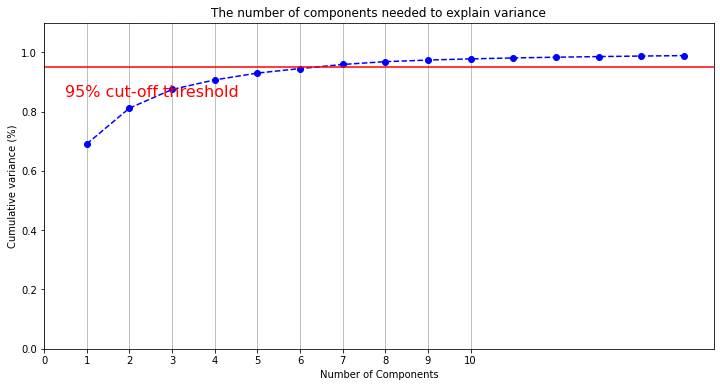

In [104]:
pca = PCA(n_components=15).fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [108]:
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

reg = LinearRegression().fit(principalDf, train_data['formation_energy_ev_natom'])
reg.score(principalDf,train_data['formation_energy_ev_natom'])

0.7246599928561226

In [109]:
dfcombined = pd.concat([train_data, principalDf], axis=1)
dfcombined2 = dfcombined.drop(['id','formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
dfcombined2.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,70,71,72,73,74,75,76,77,78,79
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,...,-0.003700,-0.002907,0.004438,0.001137,0.001608,-0.012608,0.002607,-0.000743,-0.001971,-0.004777
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,...,0.000900,0.010686,-0.014056,-0.007346,0.003003,0.008881,0.006281,-0.009465,-0.005478,-0.005299
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,...,-0.000182,-0.001170,-0.001962,0.000589,-0.000964,-0.000659,0.000600,0.000013,-0.000809,0.000060
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,...,-0.000245,0.000454,-0.000142,0.001563,0.000906,0.000429,0.000110,0.000496,-0.000037,0.000061
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,...,0.003742,-0.026200,0.005514,-0.000055,-0.007035,-0.003736,-0.003962,0.004179,-0.011264,0.004670


In [110]:
reg = LinearRegression().fit(dfcombined2, train_data['formation_energy_ev_natom'])
reg.score(dfcombined2,train_data['formation_energy_ev_natom'])

/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8137277059775431

In [111]:
#eigen spectrum for EWALD SUM MATRIX

ewald_spectrum_list = []

for i in range(len(molecules)):
    indv_ewald_matrices = EwaldSumMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2",
    ).create(molecules[i], n_jobs=6)

    indv_ewald_matrices_reshaped = np.reshape(indv_ewald_matrices, (80, 80))
    ewald_spectrum = get_eigenspectrum(indv_ewald_matrices_reshaped)
    
    ewald_spectrum_list.append(ewald_spectrum)

In [112]:
ewald_spectrum_df = pd.DataFrame(ewald_spectrum_list).astype(np.float)
ewald_spectrum_df = ewald_spectrum_df.fillna(0)
ewald_spectrum_df

ipykernel_launcher:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,459.572211,364.704069,295.205451,219.571880,208.766331,166.449031,66.719206,65.408416,55.399275,48.678502,...,-186.214720,-192.264956,-228.962156,-238.717015,-244.023073,-267.927011,-278.741454,-303.356993,-307.546466,-476.450750
1,3777.806938,3344.766610,589.356548,496.371385,105.150403,98.219701,20.296965,-10.533357,-10.805411,-11.177323,...,-307.395484,-325.091621,-372.119314,-399.911131,-424.755290,-465.096040,-477.996824,-478.952069,-487.131754,-667.531376
2,832.762436,669.912298,57.839067,49.539934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-70.846980,-71.097729,-71.581234,-72.125587,-74.380757,-75.640609,-109.456096,-234.715876,-285.491451,-418.927026
3,1440.064967,733.151051,46.998168,38.744771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-70.075593,-70.466186,-72.809680,-73.883759,-75.286318,-77.404511,-117.552051,-353.486578,-639.546683,-1084.506918
4,8983.912650,8983.474376,1670.623596,943.731659,146.533894,146.522038,16.552374,-8.164603,-8.209158,-8.214548,...,-561.596403,-1059.341082,-1060.893877,-1062.266189,-1063.459074,-1063.461428,-1065.022355,-1066.403602,-1067.611386,-1601.427763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,311.972378,196.797838,189.435192,144.368662,52.511461,39.119599,25.230035,12.980768,0.000000,0.000000,...,-63.775952,-65.267153,-66.034270,-66.152769,-67.393318,-93.337420,-173.887463,-219.434794,-287.229025,-407.401384
2396,1361.464977,1003.564967,55.962733,44.188077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-73.737317,-75.171496,-85.636250,-156.529951,-196.503222,-281.874100,-371.327033,-398.051272,-437.221871,-647.142156
2397,425.910215,425.851317,303.334557,291.810908,276.377835,276.343502,76.986498,76.958747,56.709266,56.686167,...,-232.328740,-250.291989,-250.299072,-252.524880,-252.558152,-276.433068,-329.443671,-329.457122,-335.278875,-558.896661
2398,991.781390,778.459059,647.441972,404.111826,331.306743,253.883612,107.142493,86.997317,66.649259,58.204294,...,-465.939503,-500.554656,-527.918242,-581.692087,-592.663837,-673.256461,-686.042816,-705.287119,-728.866662,-1268.052026


In [113]:
x = ewald_spectrum_df.loc[:,:].values
y = train_data.loc[:,['formation_energy_ev_natom']].values
x = StandardScaler().fit_transform(x)

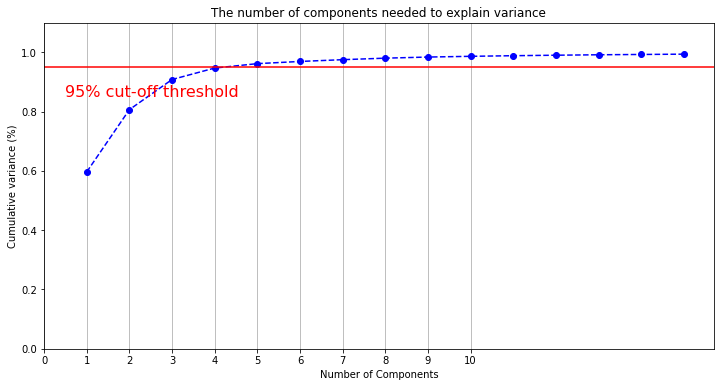

In [114]:
pca = PCA(n_components=15).fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [118]:
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

reg = LinearRegression().fit(principalDf, train_data['formation_energy_ev_natom'])
reg.score(principalDf,train_data['formation_energy_ev_natom'])

0.7793712684238527

In [119]:
dfcombined = pd.concat([train_data, principalDf], axis=1)
dfcombined2 = dfcombined.drop(['id','formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
dfcombined2.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,70,71,72,73,74,75,76,77,78,79
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,...,0.001421,-0.001074,0.000751,-0.004259,0.000712,0.000681,-0.001414,0.000850,-0.001472,-0.000156
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,...,0.003721,-0.005334,-0.006674,0.000329,0.005847,0.000448,-0.003898,0.000041,0.001687,0.000426
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,...,0.001140,-0.000078,0.000049,-0.000185,0.000092,-0.000034,0.000150,-0.000010,0.000093,-0.000002
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,...,0.000042,-0.000050,-0.000395,-0.000112,-0.000316,-0.000187,0.000081,0.000105,0.000198,-0.000156
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,...,0.004400,-0.000549,-0.000123,0.002322,0.002275,0.003178,0.000094,-0.001723,0.000096,0.000035


In [120]:
reg = LinearRegression().fit(dfcombined2, train_data['formation_energy_ev_natom'])
reg.score(dfcombined2,train_data['formation_energy_ev_natom'])

/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8183328749251502

In [121]:
x_c = coulomb_spectrum_df.loc[:,:].values
y = train_data.loc[:,['formation_energy_ev_natom']].values
x_c = StandardScaler().fit_transform(x_c)

x_s = sine_spectrum_df.loc[:,:].values
x_s = StandardScaler().fit_transform(x_s)

x_e = ewald_spectrum_df.loc[:,:].values
x_e = StandardScaler().fit_transform(x_e)

In [122]:
pca_c = PCA(n_components=9).fit(x_c) #9
pca_s = PCA(n_components=7).fit(x_s) #7
pca_e = PCA(n_components=5).fit(x_e) #5

In [123]:
principalComponents_c = pca_c.fit_transform(x_c)
principalDf_c = pd.DataFrame(data = principalComponents_c)

principalComponents_s = pca_c.fit_transform(x_s)
principalDf_s = pd.DataFrame(data = principalComponents_s)

principalComponents_e = pca_c.fit_transform(x_e)
principalDf_e = pd.DataFrame(data = principalComponents_e)

dfcombined_c = pd.concat([train_data, principalDf_c], axis=1)
dfcombined2_c = dfcombined_c.drop(['id','formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
dfcombined2_c.head()

dfcombined_s = pd.concat([train_data, principalDf_s], axis=1)
dfcombined2_s = dfcombined_s.drop(['id','formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
dfcombined2_s.head()

dfcombined_e = pd.concat([train_data, principalDf_e], axis=1)
dfcombined2_e = dfcombined_e.drop(['id','formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
dfcombined2_e.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,0,1,2,3,4,5,6,7,8
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,-0.217935,4.888345,-3.453717,0.572505,0.253309,-0.661961,0.907501,-0.437272,-0.211124
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,4.798196,-3.904122,-6.654930,1.365515,-0.103370,-0.707233,-0.824026,0.780430,-0.775311
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,-8.020484,-0.910157,-0.341258,2.150770,1.113640,-0.644414,0.199551,0.237722,0.715789
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,-8.518402,-1.323789,0.469936,1.179540,0.403704,0.448864,-0.388646,-0.270016,-0.149327
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,13.234314,-5.291135,3.091594,4.021081,-2.912328,-1.215280,0.801213,-0.299725,-1.334996


In [125]:
reg_c = LinearRegression().fit(principalDf_c, train_data['formation_energy_ev_natom'])
print("Score for Coulomb + LinReg: ", reg_c.score(principalDf_c,train_data['formation_energy_ev_natom']))

reg_s = LinearRegression().fit(principalDf_s, train_data['formation_energy_ev_natom'])
print("Score for Sine + LinReg: ", reg_s.score(principalDf_s,train_data['formation_energy_ev_natom']))

reg_e = LinearRegression().fit(principalDf_e, train_data['formation_energy_ev_natom'])
print("Score for Ewald + LinReg: ", reg_e.score(principalDf_e,train_data['formation_energy_ev_natom']))

Score for Coulomb + LinReg:  0.2736080390803125
Score for Sine + LinReg:  0.47327849775638564
Score for Ewald + LinReg:  0.3794169592113873


In [136]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [128]:
ridge_reg_c = Ridge(alpha=0.001).fit(principalDf_c, train_data['formation_energy_ev_natom'])
print("Score for Coulomb + Ridge Reg: ", ridge_reg_c.score(principalDf_c,train_data['formation_energy_ev_natom']))

ridge_reg_s = Ridge(alpha=0.001).fit(principalDf_s, train_data['formation_energy_ev_natom'])
print("Score for Sine + Ridge Reg: ", ridge_reg_s.score(principalDf_s,train_data['formation_energy_ev_natom']))

ridge_reg_e = Ridge(alpha=0.001).fit(principalDf_e, train_data['formation_energy_ev_natom'])
print("Score for Ewald + Ridge Reg: ", ridge_reg_e.score(principalDf_e,train_data['formation_energy_ev_natom']))

Score for Coulomb + Ridge Reg:  0.2736080390802894
Score for Sine + Ridge Reg:  0.47327849775633424
Score for Ewald + Ridge Reg:  0.37941695921124574


In [132]:
lasso_reg_c = Lasso(alpha=0.001, max_iter=1e5).fit(principalDf_c, train_data['formation_energy_ev_natom'])
print("Score for Coulomb + Lasso Reg: ", lasso_reg_c.score(principalDf_c,train_data['formation_energy_ev_natom']))

lasso_reg_s = Lasso(alpha=0.001, max_iter=1e5).fit(principalDf_s, train_data['formation_energy_ev_natom'])
print("Score for Sine + Lasso Reg: ", lasso_reg_s.score(principalDf_s,train_data['formation_energy_ev_natom']))

lasso_reg_e = Lasso(alpha=0.001, max_iter=1e5).fit(principalDf_e, train_data['formation_energy_ev_natom'])
print("Score for Ewald + Lasso Reg: ", lasso_reg_e.score(principalDf_e,train_data['formation_energy_ev_natom']))

Score for Coulomb + Lasso Reg:  0.27294291315043695
Score for Sine + Lasso Reg:  0.4726680098162742
Score for Ewald + Lasso Reg:  0.37840704631839417


In [135]:
rf_c = RandomForestRegressor(n_estimators=1000, random_state=2).fit(principalDf_c, train_data['formation_energy_ev_natom'])
print("Score for Coulomb + RF Reg: ", rf_c.score(principalDf_c,train_data['formation_energy_ev_natom']))

rf_s = RandomForestRegressor(n_estimators=1000, random_state=2).fit(principalDf_s, train_data['formation_energy_ev_natom'])
print("Score for Sine + RF Reg: ", rf_s.score(principalDf_s,train_data['formation_energy_ev_natom']))

rf_e = RandomForestRegressor(n_estimators=1000, random_state=2).fit(principalDf_e, train_data['formation_energy_ev_natom'])
print("Score for Ewald + RF Reg: ", rf_e.score(principalDf_e,train_data['formation_energy_ev_natom']))


Score for Coulomb + RF Reg:  0.9219629173011572
Score for Sine + RF Reg:  0.9699765581906306
Score for Ewald + RF Reg:  0.9716140210512212


In [137]:
X_train, X_test, y_train, y_test = train_test_split(principalDf_c, train_data['formation_energy_ev_natom'], test_size = 0.30, random_state=1)
rf_c2 = RandomForestRegressor(n_estimators=1000, random_state=2).fit(X_train, y_train)
y_pred = rf_c2.predict(X_test)
print("Accuracy:", round((rf_c2.score(X_test, y_pred)*100),2), "%")

Accuracy: 100.0 %


In [138]:
X_train, X_test, y_train, y_test = train_test_split(principalDf_s, train_data['formation_energy_ev_natom'], test_size = 0.30, random_state=1)
rf_c2 = RandomForestRegressor(n_estimators=1000, random_state=2).fit(X_train, y_train)
y_pred = rf_c2.predict(X_test)
print("Accuracy:", round((rf_c2.score(X_test, y_pred)*100),2), "%")

Accuracy: 100.0 %


In [140]:
X_train, X_test, y_train, y_test = train_test_split(principalDf_e, train_data['formation_energy_ev_natom'], test_size = 0.30, random_state=1)
rf_c2 = RandomForestRegressor(n_estimators=1000, random_state=2).fit(X_train, y_train)
y_pred = rf_c2.predict(X_test)
print("Accuracy:", ((rf_c2.score(X_test, y_pred)*100)), "%")

Accuracy: 100.0 %
